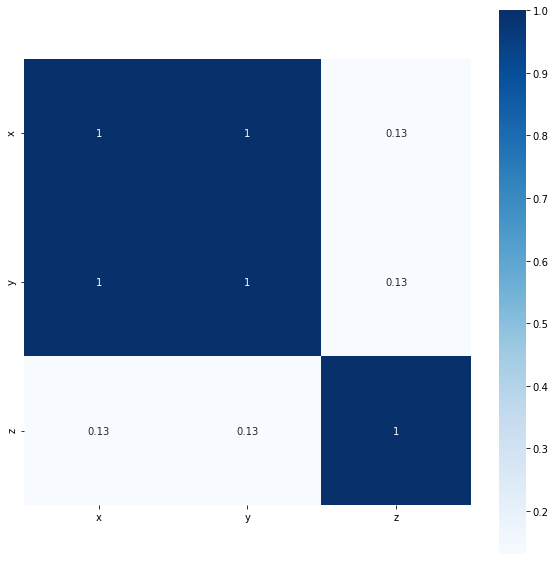

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
x = np.random.randint(0, 1500, 10) #0~100隨機找10筆數據
y = 5 * x 
z = np.random.randint(0,1500,10)
l = ['a','b','c','d','e','f','g','h','i','j'] #新增的

dataframe = pd.DataFrame({'x':x,'y':y,'z':z,'l':l})

df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

In [60]:
df_train = pd.read_csv('AT092060-1/v2-5-machine-learning/Kaggle_practice/house_prices_advanced_regression_techniques/train.csv',index_col=False)
df_test = pd.read_csv('AT092060-1/v2-5-machine-learning/Kaggle_practice/house_prices_advanced_regression_techniques/test.csv')
print('train.shape: ',train.shape)
print('test.shape: ',test.shape)
print(train.columns)
alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
alldata = alldata.reset_index(drop=True)
print(df_train) #印出資料查看資料內容
print(df_test) #印出資料查看資料內容

train.shape:  (1460, 81)
test.shape:  (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea

In [61]:
#先看看基本資料們
print(df_train.shape) #查看trian的形狀，以方便後來訂定神經網路的輸入層
print(df_test.shape)  #查看test形狀
print('*'*20)
print(df_train.dtypes) #看一下訓練資料的各個欄位的型態

(1460, 81)
(1459, 80)
********************
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [62]:
df_train.drop("Id",inplace = True,axis=1) #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_test.drop("Id",inplace = True,axis=1)  #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_train.head(10) #.head()可以查看前幾筆資料，括號填入數字

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


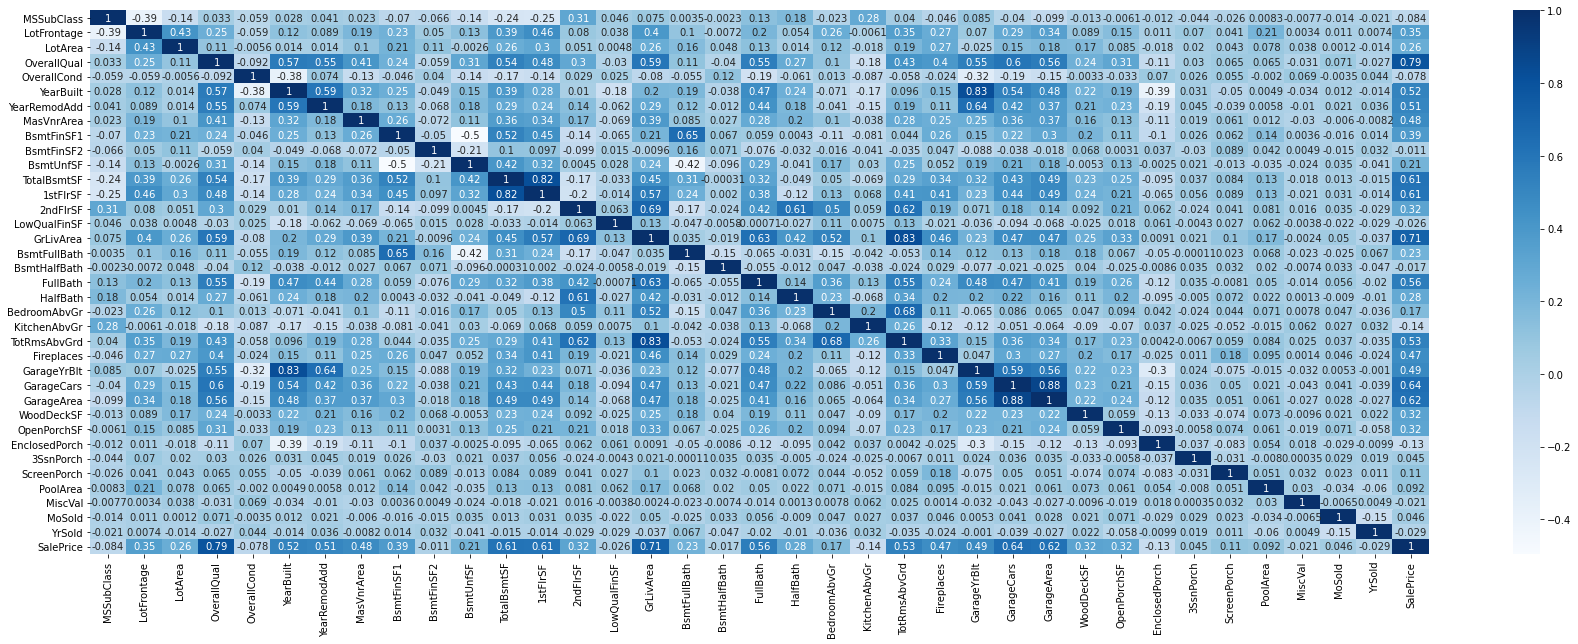

In [63]:
import seaborn as sns
trian_corr =df_train.corr() #計算相關係數
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [64]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.75]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.7 這句的意思是與SalePrice有關的係數>0.7的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.7 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.7的傳回去
print(high_corr) 

Index(['OverallQual', 'SalePrice'], dtype='object')


In [65]:
float_data = trian_corr.index #是float或int的的傢伙
all_col = df_train.columns #全部的col
object_data = []
for i in range(len(all_col)): #查找全部的all_col，len(all_col)是長度(要全部找過一遍)
    if all_col[i] not in float_data: #如果在float_data裡面沒有，表示它是object幫的
        object_data.append(all_col[i]) #不是就加上去
print(len(object_data))
print(object_data)

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [66]:
from sklearn.preprocessing import LabelEncoder
#df_train[pd.isnull(df_train)]  = 'NaN'
for i in object_data: #將轉換是object的傢伙轉換，從object_data陣列一個一個抓出來改造
        df_train[i] = LabelEncoder().fit_transform(df_train[i].factorize()[0]) 
        #pd.factorize()[0]會給nans(缺失值)一個-1的值，若沒寫這個，會造成等號兩邊不等的情況
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,0,2,...,0,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,1,0,0,1,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


(80, 80)


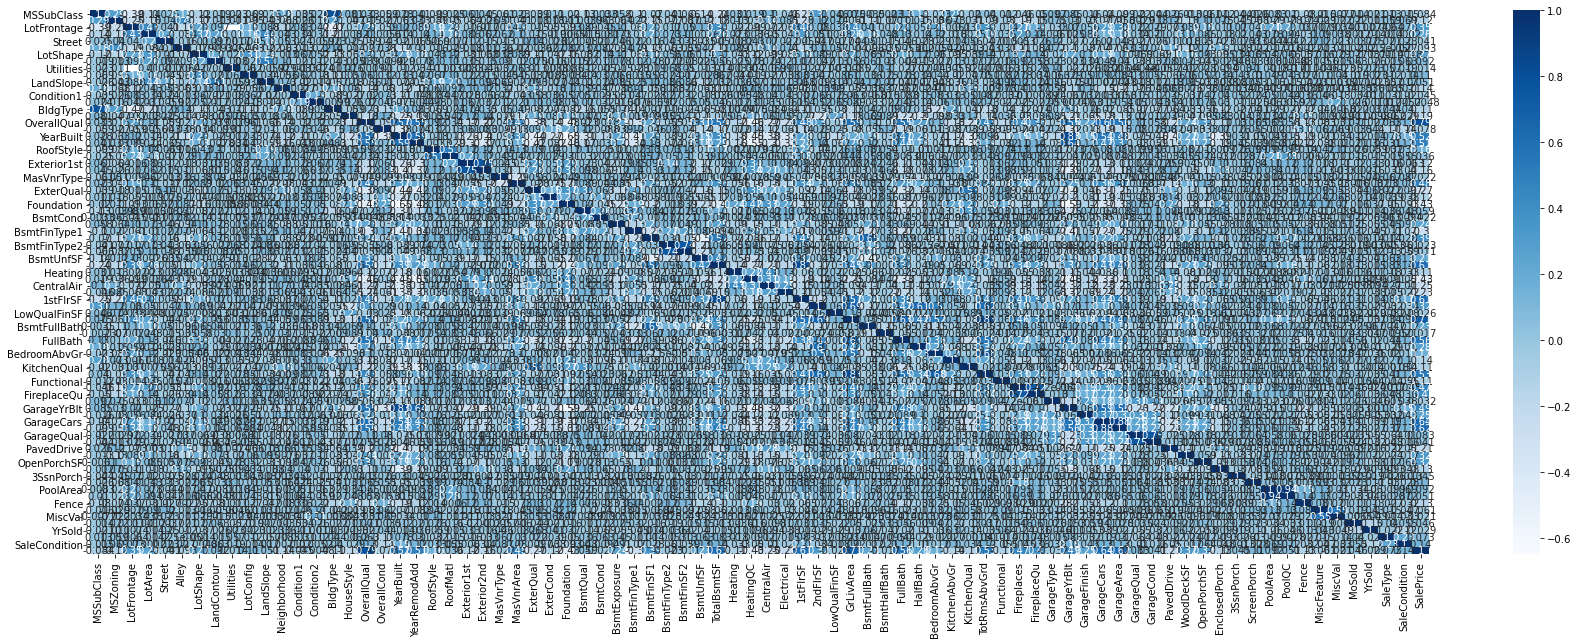

In [67]:
import seaborn as sns
trian_corr =df_train.corr() #計算相關係數
print(trian_corr.shape) #查看形狀
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [68]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.75]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['OverallQual', 'SalePrice'], dtype='object')


In [69]:
for i in df_train.columns: #查找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.6的話
        df_train = df_train.drop(i,axis=1) #就把它拔掉
print(df_train)

      OverallQual  SalePrice
0               7     208500
1               6     181500
2               7     223500
3               7     140000
4               8     250000
...           ...        ...
1455            6     175000
1456            6     210000
1457            7     266500
1458            5     142125
1459            5     147500

[1460 rows x 2 columns]


In [71]:
train_targets = df_train["SalePrice"].values #把SalePrice這行數值整個拉出來
train_data = df_train.drop(columns=["SalePrice"]) #刪除SalePrice這行
print(train_targets)
print("*"*50)
print(train_data)

[208500 181500 223500 ... 266500 142125 147500]
**************************************************
      OverallQual
0               7
1               6
2               7
3               7
4               8
...           ...
1455            6
1456            6
1457            7
1458            5
1459            5

[1460 rows x 1 columns]


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_trian,Y_validation = train_test_split(train_data, train_targets, test_size=0.6, random_state=0)
#X_train,X_test, y_train, y_test = model_selection.train_test_split(train_data,train_target,test_size=0.2, random_state=0)
#train_test_split的括號裡面，1.資料的x那些種類2.y的部分3.X_test的部分要佔全部資料的多少(我們這裡是驗證集唷)4.指定一個隨機種子，0的話就是隨機囉
#就是一種隨機切分資料的功能
#隨機種子相同的話，在另一個框框在跑一次一樣的code還是會出現相同的隨機數
print(X_train.shape)
print(Y_trian.shape)
print('*'*50)
print(X_validation.shape)
print(Y_validation.shape)
X_train_dataset = X_train.values #取出數值，轉換回list
X_validation_dataset = X_validation.values
print(X_train_dataset)

(584, 1)
(584,)
**************************************************
(876, 1)
(876,)
[[ 6]
 [ 5]
 [ 7]
 [ 5]
 [ 7]
 [ 5]
 [ 8]
 [ 6]
 [ 5]
 [ 7]
 [ 6]
 [ 4]
 [ 5]
 [ 6]
 [ 5]
 [ 6]
 [10]
 [ 8]
 [ 8]
 [ 6]
 [ 6]
 [ 5]
 [ 7]
 [ 5]
 [ 7]
 [ 5]
 [ 7]
 [ 5]
 [ 3]
 [ 6]
 [ 5]
 [ 8]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 8]
 [ 6]
 [ 8]
 [ 6]
 [ 7]
 [ 6]
 [ 7]
 [ 4]
 [ 7]
 [ 3]
 [ 7]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 6]
 [ 7]
 [ 4]
 [ 6]
 [ 5]
 [ 8]
 [ 8]
 [ 5]
 [ 6]
 [ 6]
 [ 5]
 [ 5]
 [ 8]
 [ 6]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 8]
 [ 6]
 [ 5]
 [ 7]
 [ 6]
 [ 8]
 [ 7]
 [ 7]
 [ 6]
 [ 5]
 [ 7]
 [ 6]
 [ 8]
 [ 9]
 [ 6]
 [ 7]
 [ 6]
 [ 5]
 [ 7]
 [ 6]
 [ 6]
 [ 4]
 [ 6]
 [ 5]
 [ 5]
 [ 6]
 [ 7]
 [ 6]
 [ 7]
 [ 7]
 [ 9]
 [ 7]
 [ 7]
 [ 9]
 [ 5]
 [ 7]
 [ 7]
 [ 6]
 [ 7]
 [ 8]
 [ 4]
 [ 7]
 [ 5]
 [ 8]
 [ 7]
 [ 7]
 [ 6]
 [ 7]
 [ 8]
 [ 5]
 [ 6]
 [ 8]
 [ 6]
 [ 6]
 [ 8]
 [ 8]
 [ 7]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 8]
 [ 7]
 [ 5]
 [ 8]
 [ 7]
 [ 7]
 [ 5]
 [ 7]
 [ 6]
 [ 8]
 [ 5]
 [ 4]
 [ 1]
 [ 7]
 [10]
 [ 6]
 [ 6]
 [ 7]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 7]

In [73]:
from sklearn import preprocessing #引入所需函式庫
normalize = preprocessing.StandardScaler() #取一個短的名字
# 標準化處理
X_trian_normal_data = normalize.fit_transform(X_train_dataset) #將訓練資料標準化
X_validation_normal_data = normalize.fit_transform(X_validation_dataset) #將驗證資料標準化

print(X_trian_normal_data)
print('*'*50)
print(X_validation_normal_data)

[[-0.05097282]
 [-0.81425805]
 [ 0.71231242]
 [-0.81425805]
 [ 0.71231242]
 [-0.81425805]
 [ 1.47559765]
 [-0.05097282]
 [-0.81425805]
 [ 0.71231242]
 [-0.05097282]
 [-1.57754328]
 [-0.81425805]
 [-0.05097282]
 [-0.81425805]
 [-0.05097282]
 [ 3.00216811]
 [ 1.47559765]
 [ 1.47559765]
 [-0.05097282]
 [-0.05097282]
 [-0.81425805]
 [ 0.71231242]
 [-0.81425805]
 [ 0.71231242]
 [-0.81425805]
 [ 0.71231242]
 [-0.81425805]
 [-2.34082851]
 [-0.05097282]
 [-0.81425805]
 [ 1.47559765]
 [-0.05097282]
 [-0.05097282]
 [-0.05097282]
 [-0.05097282]
 [ 1.47559765]
 [-0.05097282]
 [ 1.47559765]
 [-0.05097282]
 [ 0.71231242]
 [-0.05097282]
 [ 0.71231242]
 [-1.57754328]
 [ 0.71231242]
 [-2.34082851]
 [ 0.71231242]
 [-0.05097282]
 [-0.05097282]
 [ 0.71231242]
 [ 0.71231242]
 [-0.05097282]
 [ 0.71231242]
 [-1.57754328]
 [-0.05097282]
 [-0.81425805]
 [ 1.47559765]
 [ 1.47559765]
 [-0.81425805]
 [-0.05097282]
 [-0.05097282]
 [-0.81425805]
 [-0.81425805]
 [ 1.47559765]
 [-0.05097282]
 [-0.81425805]
 [-0.05097

In [74]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers import BatchNormalization,Dropout,Dense
from keras.callbacks import ModelCheckpoint
#上方為引進所需model

#建立model
def model():
    model = Sequential()
    model.add(layers.Dense(1024,kernel_initializer = 'random_normal',
             activation = 'relu',
             input_shape = (X_trian_normal_data.shape[1],)))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(1024, kernel_initializer = 'random_normal', 
                        activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(512, kernel_initializer = 'random_normal', 
                        activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(256, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(128, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(32, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(16, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(1, kernel_initializer = 'random_normal',
                          activation = 'linear'))
    
    adam = optimizers.Adam(lr=0.05)
    #lr學習率
    model.compile(optimizer = adam, loss = 'mae')
    #設定要的優化器以及loss函數
    return model     

In [ ]:
call = ModelCheckpoint('good.h5',
                     monitor = 'val_loss',
                     verbose = 0,
                     save_best_only = True,
                     save_weights_only = True,
                     mode = 'auto',
                     period = 1)

#ModelCheckpoint：!.保存的名稱2.要監視的值3.訊息展示的樣子4.5.設置為True的時候，當監視的數值變低會立即保存，也就是保存最好的(所以也有人會讓epochs很大很大去抓最好的，但神經網路或是資料沒有多做什麼調整其實不會差到太多)6.auto模式下在比對你的監視值他會自己判斷是不是變好還是變差，要不要儲存7CheckPoint間的epcoh數
model = model()    
history = model.fit(X_trian_normal_data, Y_trian,
                    validation_data = [X_validation_normal_data, Y_validation],
                    callbacks = [call],
                    epochs = 4000, 
                    batch_size = 512, verbose = 1)
#model.fit的1.2.之前就有介紹過拉；3.validation_data就是加入驗證集去讓超參數跑得更好；4.callbacks看是否要使用，然後設定是怎樣子；5.epochs完整的資料要疊代幾次6.每次的批次大小是多少7.verbose:0是不輸出進度條；1是輸出進度條

Train on 584 samples, validate on 876 samples
Epoch 1/4000
584/584 [==============================] - 1s 1ms/step - loss: 179266.2100 - val_loss: 69598.4552
Epoch 2/4000
584/584 [==============================] - 0s 25us/step - loss: 96945.7166 - val_loss: 181993.2322
Epoch 3/4000
584/584 [==============================] - 0s 23us/step - loss: 179303.9142 - val_loss: 181996.7479
Epoch 4/4000
584/584 [==============================] - 0s 23us/step - loss: 179307.0728 - val_loss: 181996.7166
Epoch 5/4000
584/584 [==============================] - 0s 25us/step - loss: 179307.0899 - val_loss: 181997.2856
Epoch 6/4000
584/584 [==============================] - 0s 23us/step - loss: 179307.6783 - val_loss: 181996.5512
Epoch 7/4000
584/584 [==============================] - 0s 23us/step - loss: 179306.8626 - val_loss: 181996.4510
Epoch 8/4000
584/584 [==============================] - 0s 23us/step - loss: 179306.7581 - val_loss: 181996.3416
Epoch 9/4000
584/584 [==============================]

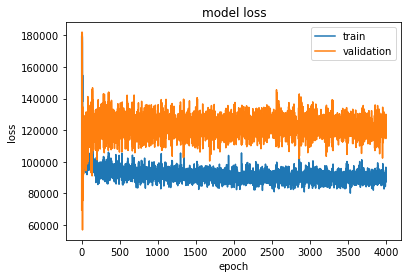

In [76]:
#history 會記錄訓練的狀況，會將model.fit回傳的東西記錄下來，以下是常用的示範
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

In [77]:
for i in df_test.columns: #查找原本資料中所有columns
    if i not in high_corr: 
        #如果沒有在訓練時相關係數大於0.6的話就拔掉，因為真正影響房價的不是小於0.6的
        df_test = df_test.drop(i,axis=1) 
        #i是跑過test裡面的columns所有人，axis=1是指定要丟掉"行"
print(df_test) #看一下刪掉相關係數小的人樣子
X_test_dataset = df_test.values #只要數值就好不要dataframe形式
from sklearn import preprocessing
normalize = preprocessing.StandardScaler() 
# 標準化處理
X_test_normal_data = normalize.fit_transform(X_test_dataset)

print(X_test_normal_data) #看一下標準化的結果

      OverallQual
0               5
1               6
2               5
3               6
4               8
...           ...
1454            4
1455            4
1456            5
1457            5
1458            7

[1459 rows x 1 columns]
[[-0.75110125]
 [-0.05487716]
 [-0.75110125]
 ...
 [-0.75110125]
 [-0.75110125]
 [ 0.64134693]]


In [78]:
model.load_weights('good.h5') #召喚之前儲存的model
pred = model.predict(X_test_normal_data) #括號內填入要預測的資料
print(pred)

[[ 56640.453]
 [137419.8  ]
 [ 56640.453]
 ...
 [ 56640.453]
 [ 56640.453]
 [259302.88 ]]


In [79]:
with open('sample_submission-1.csv', 'w') as f: #開啟一個檔案，house_predict.csv是名字；w是寫入
    f.write('id,SalePrice\n') #寫入最上方的列，並用\n往下一列
    for i in range(len(pred)): #len(pred)看整個test有多長，然後用for去跑全部
        f.write(str(i + 1461) + ',' + str(float(pred[i])) + '\n')
        #寫入，這邊特別注意「+1461」，因為它給的sample_submission是從1461開始
        #中間加上逗號是因為前面有介紹過csv檔是以逗號為間隔的檔案
        #str(float(pred[i]):先把它變成浮點數，再用str()把它變回字串
        #後面的'\n'是要換下一列的意思
        #注意到中間全部是用「+號」隔開，這是字串的基本招式唷